In [4]:
import numpy as np
import pylab as pl
import pandas as pd
from __future__ import print_function, division

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
PATH = 'I:\\COF\\COF\\Analytics_and_Automation_Engineering\\bc_sample.csv'


In [7]:
# read file to csv
df1 = pd.read_csv(PATH)

In [76]:
df1.head()

,Unnamed: 0,VendorID,shl_number,hack_number,lpep_datetime,latitude,longitude,type
0,1,1,AA145,694171.0,2015-12-20 00:00:00,-73.898824,40.872401,10
1,2,1,AA423,5607672.0,2015-12-20 00:00:00,-73.997495,40.598769,10
2,3,1,AB789,0.0,2015-12-20 00:00:00,-73.947208,40.793375,10
3,4,1,AB827,5627575.0,2015-12-20 00:00:00,-73.943447,40.810679,10
4,5,1,AC295,5550312.0,2015-12-20 00:00:00,-73.931781,40.765038,10


In [10]:
# take of look of the cars
df1.sort_values(by = 'shl_number').groupby("shl_number").count() # how many cars was

,Unnamed: 0,VendorID,hack_number,lpep_datetime,latitude,longitude,type
shl_number,,,,,,,
AA001,419,419,419,419,419,419,419
AA002,358,358,358,358,358,358,358
AA003,373,373,373,373,373,373,373
AA004,254,254,254,254,254,254,254
AA005,139,139,139,139,139,139,139
AA006,241,241,241,241,241,241,241
AA007,390,390,390,390,390,390,390
AA008,242,242,242,242,242,242,242
AA010,222,222,222,222,222,222,222


In [18]:
import geopy.distance



279.35290160386563


In [75]:
## calculate distance from coordinates
# dist = gpxpy.geo.haversine_distance(lat1, lon1, lat2, lon2)
lis = []
# Vincenty, with an accurate ellipsoidal model of the earth.
for i in range(len(df_sort)):
    if i > 0:
        coords_1 = (df_sort['latitude'].values[i-1], df_sort['longitude'].values[i-1])
        coords_2 = (df_sort['latitude'].values[i], df_sort['longitude'].values[i])
        lis.append(geopy.distance.vincenty(coords_1, coords_2).km) 
        
        
lis


[1.2433403645555967,
 0.6903002217852241,
 0.013627233100467404,
 0.013713989804257455,
 0.030547783503943302,
 0.021662277512777092,
 0.025209142840062114,
 0.04418874698926158,
 0.03670736918343333,
 0.01045439523596727,
 0.01909293921166816,
 0.006736366655773356,
 0.019943320662443587,
 0.018325626202559307,
 0.012671029872380876,
 0.017116923141962767,
 0.02048213067831925,
 0.023487823201632865,
 0.018330613029286492,
 0.007080485612846032,
 0.048084942159650375,
 0.007566422829772159,
 0.14026948836139042,
 0.1852135580442637,
 0.1527214997794143,
 0.6622898422003305,
 0.27462437650103755,
 0.03850575103192002,
 0.0007478796420532751,
 0.2742204030134212,
 1.7360284339537968,
 1.7117942195747153,
 0.4714720176861559,
 0.14773454414734097,
 0.3620219656592696,
 0.49921373859134976,
 0.6622010234220057,
 0.25795361850774945,
 0.314314384283386,
 0.004851216396368201,
 0.003142747326226037,
 0.40684581829975325,
 0.26025673603952476,
 0.17373856038155192,
 0.0009052881177320154,
 0

In [47]:
len(df_sort)

1980810

In [81]:
lis.insert(0, 0)

In [82]:
len(lis)

1980810

In [14]:
df_sort = df1.sort_values(by = ['shl_number', 'lpep_datetime'])

In [85]:
df_new = df_sort.copy()
df_new["distance"] = np.array(lis)*1000

In [92]:
pwd

'C:\\Users\\XuL\\Desktop'

In [93]:
df_new.to_csv("2015-12-20_sample_for_capstone")

In [89]:
df_new[df_new["distance"] < 1] 

,Unnamed: 0,VendorID,shl_number,hack_number,lpep_datetime,latitude,longitude,type,distance
1039,1040,2,AA001,0.0,2015-12-20 00:00:42,40.842333,-73.931205,10,0.000000
152485,152486,2,AA001,5253054.0,2015-12-20 01:19:37,40.833377,-73.941303,10,0.747880
199047,199048,2,AA001,5253054.0,2015-12-20 01:48:08,40.853177,-73.929307,10,0.905288
243675,243676,2,AA001,5253054.0,2015-12-20 02:14:24,40.870790,-73.900451,3,0.745408
282978,282979,2,AA001,0.0,2015-12-20 02:40:06,40.846827,-73.901087,4,0.418323
281608,281609,2,AA001,0.0,2015-12-20 02:40:10,40.846822,-73.901090,10,0.640638
328179,328180,2,AA001,0.0,2015-12-20 03:09:21,40.839018,-73.937142,4,0.000000
329257,329258,2,AA001,0.0,2015-12-20 03:09:22,40.839025,-73.937143,10,0.785050
492420,492421,2,AA001,5253054.0,2015-12-20 05:25:27,40.843983,-73.901973,10,0.558659
491734,491735,2,AA001,0.0,2015-12-20 05:32:36,40.843948,-73.901959,4,0.000000


In [94]:
import geopandas

ModuleNotFoundError: No module named 'geopandas'

In [139]:
t.lpep_datetime = pd.to_datetime(t.lpep_datetime)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [151]:
t.sort_values("lpep_datetime", inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [159]:
t.head(20)

,index,Unnamed: 0,VendorID,shl_number,hack_number,lpep_datetime,latitude,longitude,type
0,2272,2273,2,AB025,5422481.0,2015-12-20 00:01:14,40.696475,-73.981035,10
1,4791,4792,2,AB025,5422481.0,2015-12-20 00:03:13,40.695985,-73.984497,10
2,8669,8670,2,AB025,5422481.0,2015-12-20 00:05:13,40.691837,-73.985462,10
4,12503,12504,2,AB025,5422481.0,2015-12-20 00:06:10,40.692277,-73.985943,10
3,11978,11979,2,AB025,5422481.0,2015-12-20 00:06:54,40.693062,-73.987158,10
5,17718,17719,2,AB025,5422481.0,2015-12-20 00:08:54,40.693377,-73.983245,10
6,19272,19273,2,AB025,5422481.0,2015-12-20 00:10:54,40.693137,-73.969315,10
7,26286,26287,2,AB025,5422481.0,2015-12-20 00:12:13,40.694283,-73.965100,10
8,27232,27233,2,AB025,5422481.0,2015-12-20 00:14:13,40.699870,-73.961540,10
9,28566,28567,2,AB025,5422481.0,2015-12-20 00:14:37,40.700637,-73.962567,10


In [160]:
Time = []
d2 = 0
for i in range(len(t)-1):
    d2 = t.lpep_datetime[i+1] - t.lpep_datetime[i]
    Time.append(d2)

In [161]:
len(t)

335

In [162]:
len(lon)

334

In [163]:
t.reset_index(inplace = True)

In [164]:
lat = []
d = 0
for i in range(len(t)-1):
    d = t.latitude[i+1] - t.latitude[i]
    lat.append(d)
    


In [165]:
lon = []
d1 = 0
for i in range(len(t)-1):
    d1 = t.longitude[i+1] - t.longitude[i]
    lon.append(d1)

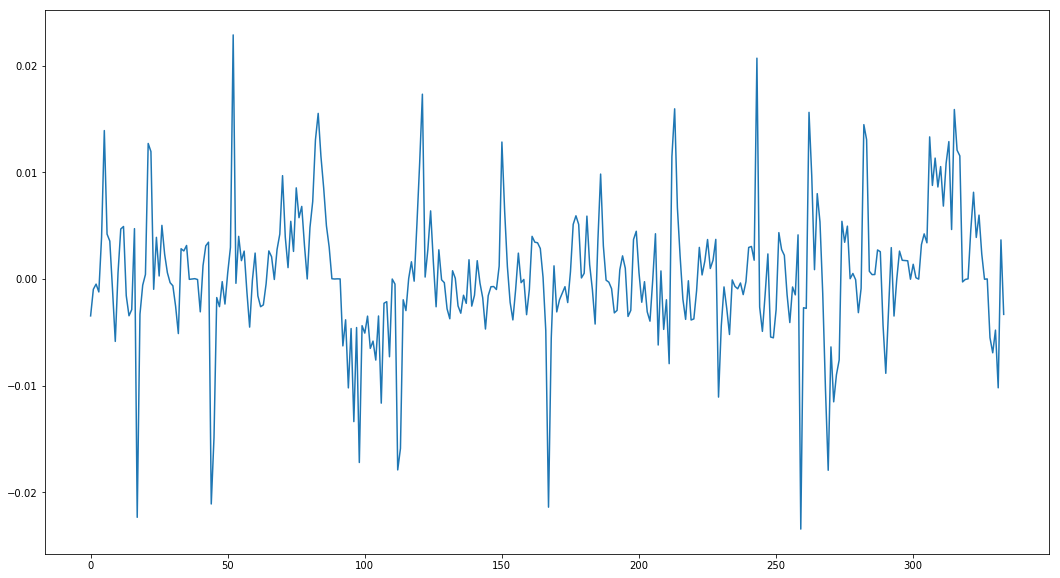

In [166]:
plt.figure(figsize=(18, 10))
plt.plot(lon)
#plt.plot(lat)

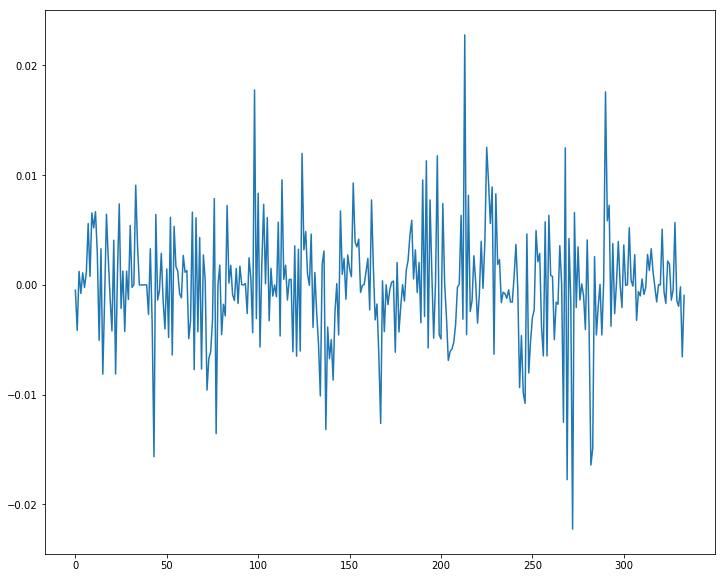

In [121]:
plt.figure(figsize=(12, 10))
plt.plot(lat)

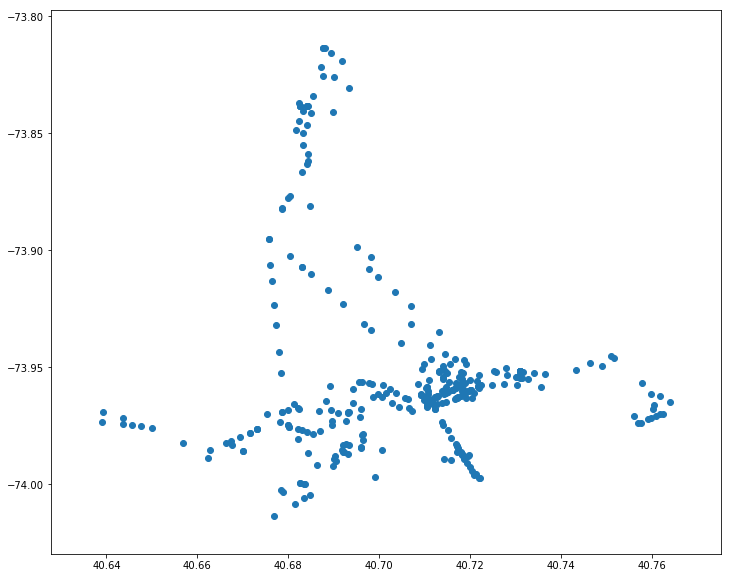

In [101]:
plt.figure(figsize=(12, 10))
plt.scatter(t.latitude, t.longitude)

In [98]:
temp['new'] = temp.d

,Unnamed: 0,lpep_pickup_datetime,shl_number,Hack_number,lpep_dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,PULocationID,DOLocationID,trip_distance,trip_time_in_secs
0,1,2015-12-20 00:06:48,AB025,5422481,2015-12-20 00:11:47,-73.987007,40.693069,-73.965096,40.694279,65,49,1.24,300
1,2,2015-12-20 00:16:24,AB025,5422481,2015-12-20 00:17:26,-73.968391,40.706993,-73.968025,40.711964,256,256,0.77,180
2,3,2015-12-20 00:24:23,AB025,5422481,2015-12-20 00:44:09,-73.960060,40.719849,-73.987717,40.718380,255,148,2.85,1200
626,627,2015-12-20 01:28:34,AB025,5422481,2015-12-20 01:47:14,-73.953262,40.728249,-73.989067,40.714272,112,232,4.06,1020
801,802,2015-12-20 02:12:42,AB025,5422481,2015-12-20 02:15:49,-73.965736,40.712822,-73.963242,40.720390,256,255,0.88,180
802,803,2015-12-20 02:18:37,AB025,5422481,2015-12-20 02:39:34,-73.961021,40.718956,-73.907074,40.683159,255,37,4.35,1260
898,899,2015-12-20 00:54:05,AB025,5422481,2015-12-20 00:58:04,-73.959396,40.718311,-73.951935,40.713238,255,256,0.74,240
10238,10239,2015-12-20 02:00:23,AB025,5422481,2015-12-20 02:04:57,-73.956459,40.716984,-73.958916,40.722252,255,255,0.67,240
21589,21590,2015-12-20 13:19:25,AB025,5422481,2015-12-20 13:33:33,-73.958130,40.710464,-73.997276,40.722118,256,144,2.25,840
22999,23000,2015-12-20 14:13:11,AB025,5422481,2015-12-20 14:26:38,-73.964806,40.714947,-73.969643,40.675522,256,181,3.23,840


In [80]:
PATH2 = 'I:\\COF\\COF\\Analytics_and_Automation_Engineering\\bc_trips_sample.csv'
df2 = pd.read_csv(PATH2)

In [97]:
df2.head()

,Unnamed: 0,lpep_pickup_datetime,shl_number,Hack_number,lpep_dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,PULocationID,DOLocationID,trip_distance,trip_time_in_secs
0,1,2015-12-20 00:06:48,AB025,5422481,2015-12-20 00:11:47,-73.987007,40.693069,-73.965096,40.694279,65,49,1.24,300
1,2,2015-12-20 00:16:24,AB025,5422481,2015-12-20 00:17:26,-73.968391,40.706993,-73.968025,40.711964,256,256,0.77,180
2,3,2015-12-20 00:24:23,AB025,5422481,2015-12-20 00:44:09,-73.960060,40.719849,-73.987717,40.718380,255,148,2.85,1200
3,4,2015-12-20 00:23:47,AC061,878289,2015-12-20 00:38:09,-73.830330,40.759624,-73.928947,40.763779,92,7,6.38,900
4,5,2015-12-20 00:25:50,AB702,847811,2015-12-20 00:34:11,-73.903549,40.745590,-73.892555,40.745087,260,83,1.55,540


In [85]:
df2.shl_number.groupby(df2.shl_number).count()


shl_number
AA001     5
AA002     8
AA003    12
AA004     2
AA006     3
AA007     6
AA010    13
AA012     5
AA014     2
AA015    16
AA017     2
AA018    31
AA019     2
AA020    14
AA022    21
AA023     5
AA024    24
AA025    13
AA027     7
AA028     4
AA029     3
AA030    15
AA031     8
AA032     7
AA033    12
AA034    10
AA036     8
AA037     7
AA038    10
AA039    14
         ..
BB908    20
BB918    29
BB928     9
BB931    19
BB936     7
BB942     9
BB956     1
BB957     7
BB960     2
BB984     4
BB986     9
BB988     4
BB991    20
BB992    17
BB998    18
BB999    17
BC001    11
BC002    27
BC004    16
BC026    11
BC027    15
BC028     7
BC029     8
BC045    25
BC046     8
BC063    18
ab595     7
ac147    19
af760    14
bb874     3
Name: shl_number, dtype: int64

In [88]:
temp = df2[df2.shl_number == "AB025"]

In [91]:
temp["new"] 

,Unnamed: 0,lpep_pickup_datetime,shl_number,Hack_number,lpep_dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,PULocationID,DOLocationID,trip_distance,trip_time_in_secs
0,1,2015-12-20 00:06:48,AB025,5422481,2015-12-20 00:11:47,-73.987007,40.693069,-73.965096,40.694279,65,49,1.24,300
1,2,2015-12-20 00:16:24,AB025,5422481,2015-12-20 00:17:26,-73.968391,40.706993,-73.968025,40.711964,256,256,0.77,180
2,3,2015-12-20 00:24:23,AB025,5422481,2015-12-20 00:44:09,-73.960060,40.719849,-73.987717,40.718380,255,148,2.85,1200
626,627,2015-12-20 01:28:34,AB025,5422481,2015-12-20 01:47:14,-73.953262,40.728249,-73.989067,40.714272,112,232,4.06,1020
801,802,2015-12-20 02:12:42,AB025,5422481,2015-12-20 02:15:49,-73.965736,40.712822,-73.963242,40.720390,256,255,0.88,180
802,803,2015-12-20 02:18:37,AB025,5422481,2015-12-20 02:39:34,-73.961021,40.718956,-73.907074,40.683159,255,37,4.35,1260
898,899,2015-12-20 00:54:05,AB025,5422481,2015-12-20 00:58:04,-73.959396,40.718311,-73.951935,40.713238,255,256,0.74,240
10238,10239,2015-12-20 02:00:23,AB025,5422481,2015-12-20 02:04:57,-73.956459,40.716984,-73.958916,40.722252,255,255,0.67,240
21589,21590,2015-12-20 13:19:25,AB025,5422481,2015-12-20 13:33:33,-73.958130,40.710464,-73.997276,40.722118,256,144,2.25,840
22999,23000,2015-12-20 14:13:11,AB025,5422481,2015-12-20 14:26:38,-73.964806,40.714947,-73.969643,40.675522,256,181,3.23,840


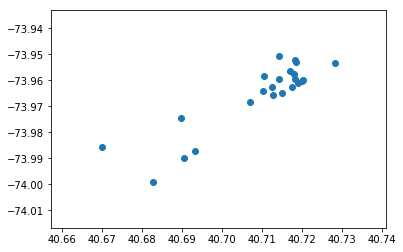

In [90]:
plt.scatter(temp.pickup_latitude, temp.pickup_longitude)

In [83]:
df2.columns

Index(['Unnamed: 0', 'lpep_pickup_datetime', 'shl_number', 'Hack_number',
       'lpep_dropoff_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'PULocationID', 'DOLocationID',
       'trip_distance', 'trip_time_in_secs'],
      dtype='object')

In [ ]:
plt.scatter(df2., median_female, marker = "o", s=300, alpha = 0.5, label = "Real data")
plt.ylabel('Female')
plt.xlabel('Male')
plt.ylim(0,40000)
plt.xlim(0,50000)
plt.plot(x_new, modelfit.predict(sm.add_constant(x_new)), "g", label = "Fit line")